<a href="https://colab.research.google.com/github/AlaaEmad1205/AlgorithmProject/blob/main/MobileNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Areej Abdullah Suleman - 1916786 - EAR
 Mai Mohamed Khalil - 2010295 - EAR

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Set paths for the directories
train_dir = ('/content/drive/MyDrive/Data/training')
img_height, img_width = 224, 224

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1647 images belonging to 3 classes.
Found 409 images belonging to 3 classes.


In [ ]:
# Load the MobileNet model without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add the top layers for classification
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the model
model.save('/content/potato_disease_classifier.h5')

17225924/17225924 [==============================] - 1s 0us/step
Epoch 1/10
52/52 [==============================] - 841s 16s/step - loss: 0.2190 - accuracy: 0.9381 - val_loss: 1.3477 - val_accuracy: 0.9144
Epoch 2/10
52/52 [==============================] - 11s 206ms/step - loss: 0.0355 - accuracy: 0.9848 - val_loss: 1.0080 - val_accuracy: 0.9046
Epoch 3/10
52/52 [==============================] - 10s 200ms/step - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.9788 - val_accuracy: 0.8313
Epoch 4/10
52/52 [==============================] - 11s 207ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 1.8702 - val_accuracy: 0.8142
Epoch 5/10
52/52 [==============================] - 10s 198ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 6/10
52/52 [==============================] - 11s 214ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0080 - val_accuracy: 0.9951
Epoch 7/10
52/52 [==============================] - 11s 207ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report

# Load the saved model
model = tf.keras.models.load_model('/content/potato_disease_classifier.h5')

# Assuming test images are in a separate directory
test_dir = ('/content/drive/MyDrive/Data/testing')
img_height, img_width = 224, 224

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=-1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print a classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Found 96 images belonging to 3 classes.
3/3 [==============================] - 35s 17s/step
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.97      0.99        36
 Potato___Late_blight       0.97      1.00      0.99        36
     Potato___healthy       1.00      1.00      1.00        24

             accuracy                           0.99        96
            macro avg       0.99      0.99      0.99        96
         weighted avg       0.99      0.99      0.99        96

3/3 [==============================] - 0s 153ms/step - loss: 0.0538 - accuracy: 0.9896
Test Loss: 0.05377107486128807
Test Accuracy: 0.9895833134651184


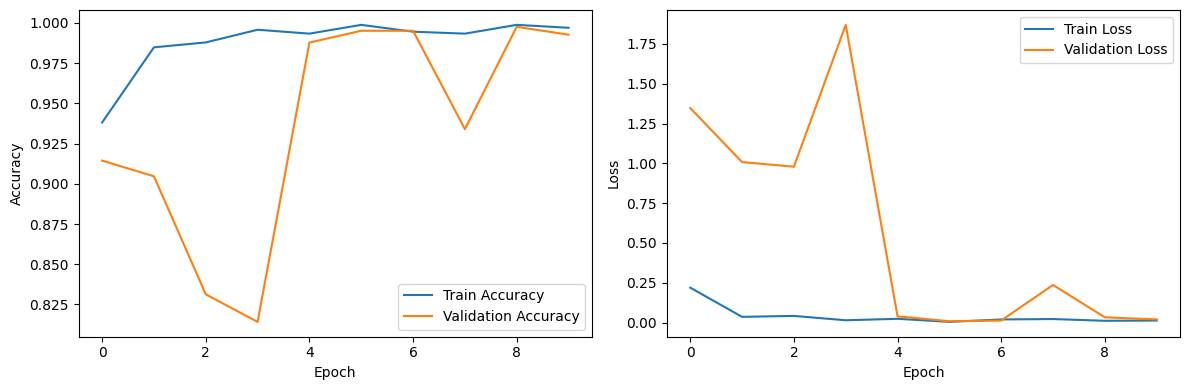

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()